<a href="https://colab.research.google.com/github/Vishal0Nagarajan/Flight-Delay-Prediction/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries and packages

import pandas as pd
import csv
import numpy as np
import xgboost as xgb
import statistics
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, scale, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeRegressor

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Fetching the dataset (ignoring Future Warnings)

warnings.simplefilter(action = 'ignore', category = FutureWarning)
df = pd.read_csv('drive/My Drive/DataPreprocessing.csv', index_col = 0)

In [ ]:
# Train Test split

x = df.loc[:, ['DepDel15', 'ArrDel15', 'DepDelayMinutes', 'windspeedKmph_y', 'DewPointF_y', 'cloudcover_y', 'precipMM_y', 'pressure_y', 'WindGustKmph_y', 'visibility_y', 'tempF_y', 'WindChillF_y', 'winddirDegree_y', 'humidity_y', 'airport_y']]
y = df.loc[:, ['ArrDelayMinutes']]
labelencoder_X = LabelEncoder()
x['airport_y'] = labelencoder_X.fit_transform(x['airport_y'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)
x1_test = x_test.copy(deep = True)
y1_test = y_test.copy(deep = True)

data = pd.concat([x_test, y_test], axis = 1)
data = data[data.ArrDel15>0]
x_test = data.iloc[:, :-1]
y_test = data.iloc[:, -1]
data = pd.concat([x_train, y_train], axis = 1)
data = data[data.ArrDel15>0]
x_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1]

In [ ]:
# Feature Scaling using Standard Scaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Linear Regression

reg = LinearRegression()
reg.fit(x_train, y_train)
y_predLiR = reg.predict(x_test)
print(r2_score(y_test, y_predLiR),'\n',mean_absolute_error(y_test, y_predLiR),'\n', mean_squared_error(y_test, y_predLiR)**0.5)

0.938145998781709 
 12.373360006192511 
 17.935895284493135


In [ ]:
# Decision Tree Regression

reg = DecisionTreeRegressor(random_state = 0, max_depth = 6)
reg.fit(x_train, y_train)
y_predDTR = reg.predict(x_test)
print(r2_score(y_test, y_predDTR),'\n',mean_absolute_error(y_test, y_predDTR),'\n', mean_squared_error(y_test, y_predDTR)**0.5)

0.9403759605807209 
 12.120262347084447 
 17.60961487974498


In [ ]:
print('REGRESSION ANALYSIS : \n')
dataset1 = pd.concat([x_test, y_test], axis = 1)
reg = LinearRegression()
reg.fit(x_train, y_train)
l = [0, 100, 200, 1000, 2000]
for i in range(len(l)):
  if l[i]!=2000:
    test_x = dataset1.loc[(dataset1.ArrDelayMinutes>=l[i]) & (dataset1.ArrDelayMinutes<l[i+1])].iloc[:, :-1]
    test_y = dataset1.loc[(dataset1.ArrDelayMinutes>=l[i]) & (dataset1.ArrDelayMinutes<l[i+1])].iloc[:, -1]
    y_predLiR = reg.predict(test_x)
    print('INTERVAL ',l[i], ' - ', l[i+1])
    print(' MSE  : ',mean_squared_error(test_y, y_predLiR),'\n','MAE  : ',mean_absolute_error(test_y, y_predLiR),'\n','RMSE : ', mean_squared_error(test_y, y_predLiR)**0.5)
  print()

REGRESSION ANALYSIS : 

INTERVAL  0  -  100
 MSE  :  218.59728443863025 
 MAE  :  11.067768673177957 
 RMSE :  14.785035828114529

INTERVAL  100  -  200
 MSE  :  757.2067176490563 
 MAE  :  18.325139105531917 
 RMSE :  27.517389368344087

INTERVAL  200  -  1000
 MSE  :  1048.3452587786699 
 MAE  :  20.186226988277554 
 RMSE :  32.378160212999596

INTERVAL  1000  -  2000
 MSE  :  1023.6160349827297 
 MAE  :  26.947451889901153 
 RMSE :  31.99399998410217




In [ ]:
#dataset1[(dataset1.ArrDelayMinutes>=200)]
len(dataset1[(dataset1.ArrDelayMinutes>=0) & (dataset1.ArrDelayMinutes<=100)])

80989

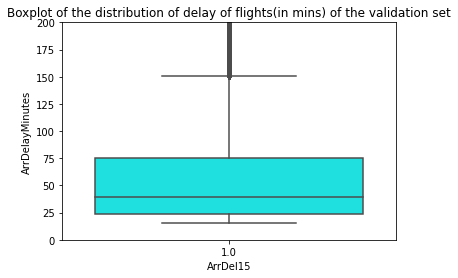

In [ ]:
dataset1 = pd.concat([x1_test, y1_test], axis = 1)
temp = pd.DataFrame()
temp['ArrDel15'] = dataset1[dataset1.ArrDel15>0].ArrDel15
temp['ArrDelayMinutes'] = dataset1[dataset1.ArrDel15>0].ArrDelayMinutes
#y_train.rename('ArrDelayMinutes')
#dataset = pd.concat([x_train, y_train], axis = 1)
axes = sns.boxplot(x = 'ArrDel15', y = 'ArrDelayMinutes', data = temp, color = 'cyan')
axes.set(ylim=(0, 200))
plt.title('Boxplot of the distribution of delay of flights(in mins) of the validation set')
plt.savefig('drive/My Drive/boxplot.eps', format = 'eps', bbox_inches = 'tight')

In [ ]:
# Extra Trees Regressor

reg = ExtraTreesRegressor(max_depth = 5)
reg.fit(x_train, y_train.values.ravel())
y_predETR = reg.predict(x_test)
print(r2_score(y_test, y_predETR),'\n',mean_absolute_error(y_test, y_predETR),'\n', mean_squared_error(y_test, y_predETR)**0.5)

0.9022463908700485 
 16.630704053895066 
 22.54787200443966


In [ ]:
# XGBoost Regressor

reg = xgb.XGBRegressor()
reg.fit(x_train, y_train)
y_predXGR = reg.predict(x_test)
print(r2_score(y_test, y_predXGR),'\n',mean_absolute_error(y_test, y_predXGR),'\n', mean_squared_error(y_test, y_predXGR)**0.5)

[17:51:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9418177570811275 
 11.952818092307934 
 17.395398815413866


In [ ]:
# Read the train and test set files

x_train = pd.read_csv('drive/My Drive/x_train.csv', index_col = 0).reset_index()
x_test = pd.read_csv('drive/My Drive/x_test.csv', index_col = 0).reset_index()
y_train = pd.read_csv('drive/My Drive/y_train.csv', index_col = 0).reset_index()
y_test = pd.read_csv('drive/My Drive/y_test.csv', index_col = 0).reset_index()

In [ ]:
# Retrieve the new train and test sets
tempX_train = pd.concat([x_train, y_train], axis = 1)
tempX_train = tempX_train[tempX_train.ArrDel15>0]
tempX_train = tempX_train.loc[:,~tempX_train.columns.duplicated()]
tempX_test = pd.merge(tempX_train, df, how = 'left', left_on = 'index', right_on = df.index)
tempX_test = tempX_test.iloc[:, 31]
tempX_train = tempX_train.iloc[:, 1:]
tempY_train = pd.concat([x_test, y_test], axis = 1)
tempY_train = tempY_train[tempY_train.ArrDel15>0]
tempY_train = tempY_train.loc[:,~tempY_train.columns.duplicated()]
tempY_test = pd.merge(tempY_train, df, how = 'left', left_on = 'index', right_on = df.index)
tempY_test = tempY_test.iloc[:, 31]
tempY_train = tempY_train.iloc[:, 1:]
x_train = tempX_train
y_train = tempX_test
x_test = tempY_train
y_test = tempY_test
x_train = x_train.drop(columns = ['DepDel15', 'ArrDel15', 'visibility_y', 'cloudcover_y'])
x_test = x_test.drop(columns = ['DepDel15', 'ArrDel15', 'visibility_y', 'cloudcover_y'])